In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Import requests library
import requests
# Import API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
from citipy import citipy

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d8e63537f8e626b31d1059c600c781fe


In [5]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-56.000, high=80.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the lats and longs to a list
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

699

In [8]:

# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.     ")
print('------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.     
------------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | hiranagar
Processing Record 6 of Set 1 | palu
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | staryy nadym
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | marawi
Processing Record 12 of Set 1 | finnsnes
Processing Record 13 of Set 1 | paracatu
Processing Record 14 of Set 1 | port moresby
Processing Record 15 of Set 1 | paamiut
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | neiafu
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | concordia
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | pastavy
Pro

City not found. Skipping...
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | plyussa
Processing Record 43 of Set 4 | alotau
City not found. Skipping...
Processing Record 44 of Set 4 | yerbogachen
Processing Record 45 of Set 4 | anantapur
Processing Record 46 of Set 4 | igrim
Processing Record 47 of Set 4 | yenotayevka
Processing Record 48 of Set 4 | dolores
Processing Record 49 of Set 4 | zabaykalsk
Processing Record 50 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 1 of Set 5 | bardiyah
Processing Record 2 of Set 5 | sujiatun
Processing Record 3 of Set 5 | port hardy
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | matay
Processing Record 6 of Set 5 | krasnoselkup
Processing Record 7 of Set 5 | plettenberg bay
Processing Record 8 of Set 5 | morros
Processing Record 9 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 5 | east london
Processing Record 11 of Set 5 

City not found. Skipping...
Processing Record 30 of Set 8 | buqayq
City not found. Skipping...
Processing Record 31 of Set 8 | darfield
Processing Record 32 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 33 of Set 8 | saint george
Processing Record 34 of Set 8 | qandala
Processing Record 35 of Set 8 | ribeira grande
Processing Record 36 of Set 8 | pangai
Processing Record 37 of Set 8 | sambava
Processing Record 38 of Set 8 | manhattan beach
Processing Record 39 of Set 8 | el cobre
Processing Record 40 of Set 8 | bilma
Processing Record 41 of Set 8 | monchegorsk
Processing Record 42 of Set 8 | marrakesh
Processing Record 43 of Set 8 | novhorodka
Processing Record 44 of Set 8 | awbari
Processing Record 45 of Set 8 | zhangjiakou
Processing Record 46 of Set 8 | alta
Processing Record 47 of Set 8 | tirukkoyilur
Processing Record 48 of Set 8 | pak phanang
Processing Record 49 of Set 8 | bitung
Processing Record 50 of Set 8 | marienburg
Processing Record 1 of Set 9 | ca

Processing Record 19 of Set 12 | ocampo
Processing Record 20 of Set 12 | wagar
Processing Record 21 of Set 12 | lyuban
Processing Record 22 of Set 12 | adrar
Processing Record 23 of Set 12 | perai
Processing Record 24 of Set 12 | manavalakurichi
Processing Record 25 of Set 12 | oktyabrskiy
Processing Record 26 of Set 12 | lexington
Processing Record 27 of Set 12 | stillwater
Processing Record 28 of Set 12 | smithers
Processing Record 29 of Set 12 | la rioja
Processing Record 30 of Set 12 | touros
Processing Record 31 of Set 12 | harlingen
Processing Record 32 of Set 12 | arawa
Processing Record 33 of Set 12 | terrace bay
Processing Record 34 of Set 12 | aswan
Processing Record 35 of Set 12 | betulia
Processing Record 36 of Set 12 | lagoa
Processing Record 37 of Set 12 | atar
Processing Record 38 of Set 12 | woodstock
Processing Record 39 of Set 12 | krasnyy
Processing Record 40 of Set 12 | barentu
Processing Record 41 of Set 12 | turukhansk
Processing Record 42 of Set 12 | riyadh
Proce

In [9]:

len(city_data)


650

In [10]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,51.01,57,1,3.44,US,2021-05-17 03:18:40
1,Qaanaaq,77.4840,-69.3632,22.60,95,100,4.07,GL,2021-05-17 03:18:41
2,Yellowknife,62.4560,-114.3525,39.20,65,75,6.91,CA,2021-05-17 03:14:13
3,Hiranagar,32.4500,75.2667,93.47,18,3,2.95,IN,2021-05-17 03:18:42
4,Palu,-0.8917,119.8707,87.94,71,82,2.66,ID,2021-05-17 03:18:43
5,Hobart,-42.8794,147.3294,55.99,44,75,11.50,AU,2021-05-17 03:18:43
6,Nikolskoye,59.7035,30.7861,52.00,87,8,6.71,RU,2021-05-17 03:18:44
7,Staryy Nadym,65.6118,72.6842,43.21,67,98,8.43,RU,2021-05-17 03:18:44
8,Vaini,-21.2000,-175.2000,80.60,83,40,6.91,TO,2021-05-17 03:18:45
9,Marawi,7.9986,124.2928,93.00,66,90,4.54,PH,2021-05-17 03:18:46


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-05-17 03:18:40,42.0970,-79.2353,51.01,57,1,3.44
1,Qaanaaq,GL,2021-05-17 03:18:41,77.4840,-69.3632,22.60,95,100,4.07
2,Yellowknife,CA,2021-05-17 03:14:13,62.4560,-114.3525,39.20,65,75,6.91
3,Hiranagar,IN,2021-05-17 03:18:42,32.4500,75.2667,93.47,18,3,2.95
4,Palu,ID,2021-05-17 03:18:43,-0.8917,119.8707,87.94,71,82,2.66
5,Hobart,AU,2021-05-17 03:18:43,-42.8794,147.3294,55.99,44,75,11.50
6,Nikolskoye,RU,2021-05-17 03:18:44,59.7035,30.7861,52.00,87,8,6.71
7,Staryy Nadym,RU,2021-05-17 03:18:44,65.6118,72.6842,43.21,67,98,8.43
8,Vaini,TO,2021-05-17 03:18:45,-21.2000,-175.2000,80.60,83,40,6.91
9,Marawi,PH,2021-05-17 03:18:46,7.9986,124.2928,93.00,66,90,4.54


In [13]:
# Create output CSV
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')


In [14]:

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Import time module
import time
# Get today's date in seconds
today = time.time()
today

1621222341.3036647

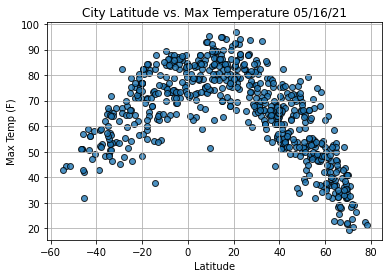

In [15]:
# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

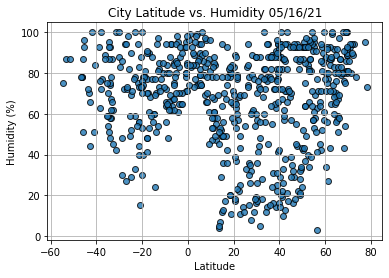

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black",
            linewidths=1, 
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

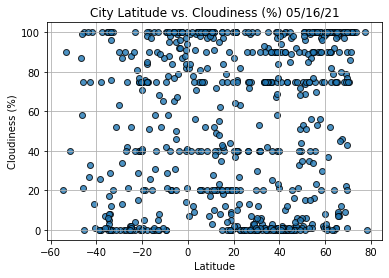

In [17]:
# Build scatter plot for lat vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

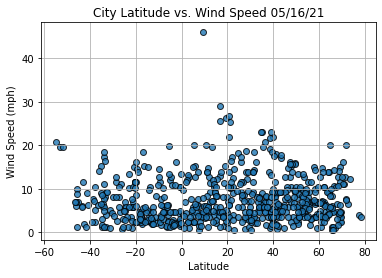

In [18]:
# Build the scatter plot for lat. vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress
import textwrap

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Clculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")

In [20]:

index13 = city_data_df.loc[13]
index13

City                      Paamiut
Country                        GL
Date          2021-05-17 03:18:48
Lat                        61.994
Lng                      -49.6678
Max Temp                    37.09
Humidity                       84
Cloudiness                     52
Wind Speed                   3.58
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-05-17 03:18:40,42.0970,-79.2353,51.01,57,1,3.44
1,Qaanaaq,GL,2021-05-17 03:18:41,77.4840,-69.3632,22.60,95,100,4.07
2,Yellowknife,CA,2021-05-17 03:14:13,62.4560,-114.3525,39.20,65,75,6.91
3,Hiranagar,IN,2021-05-17 03:18:42,32.4500,75.2667,93.47,18,3,2.95
6,Nikolskoye,RU,2021-05-17 03:18:44,59.7035,30.7861,52.00,87,8,6.71


In [22]:
# Create dataframes for Northern and Southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [23]:

len(northern_hemi_df)

459

In [24]:

len(southern_hemi_df)

191

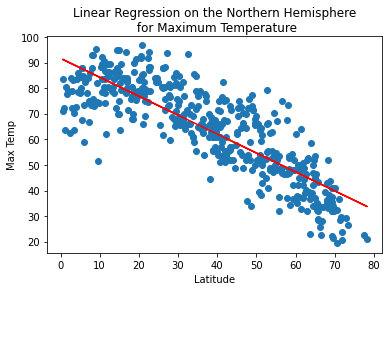

The p-value is: 0.000
The r-value is: -0.834


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(5,-20))


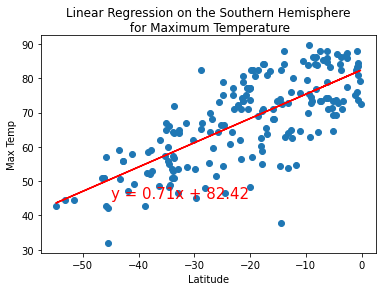

The p-value is: 0.000
The r-value is: 0.735


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

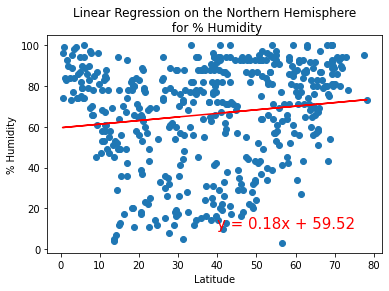

The p-value is: 0.003
The r-value is: 0.140


In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (40,10))

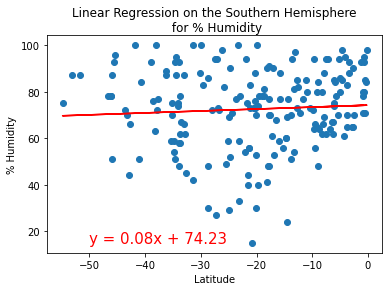

The p-value is: 0.380
The r-value is: 0.064


In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,15))

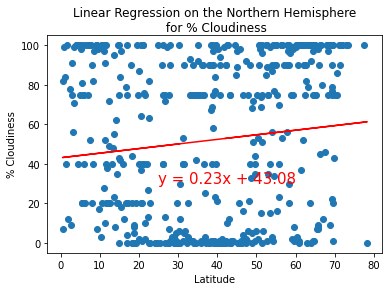

The p-value is: 0.013
The r-value is: 0.116


In [29]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

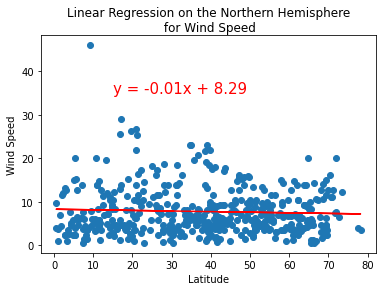

The p-value is: 0.279
The r-value is: -0.051


In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (15,35))

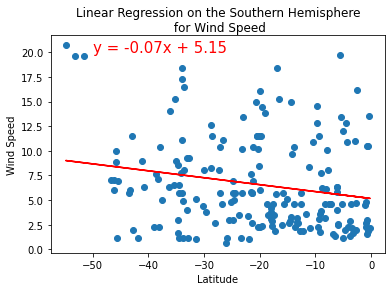

The p-value is: 0.005
The r-value is: -0.201


In [32]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (-50,20))